<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/image_processing_1_operators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

most of the content in this notebook learned from 


```
Image Operators : Image Processing in Python Jason_M._Kinser
```



In [4]:
import numpy as np
import pandas as pd
import glob
import cv2
from PIL import Image

import scipy.ndimage as nd

import matplotlib.image as mpimg

import imageio

import colorsys

import matplotlib.pyplot as plt

OPERATORS
----------
• Creation operators. These create an image or sets of images.


• Channel operators. These extract information from specific channels or combine multiple channels into one.


• Information operators. These extract information from images but do not alter the images.


• Intensity operators. These modify the intensity of the pixels in an image without changing the shapes (or content) within the image.

• Geometric operators. These move content within the image but do not change the intensity of the content.


• Transformation operators move the information into a completely different coordinate system or representation.


• Expansion operators. These convert the image information into an expanded space



# Creation operators
# Information operators

In [ ]:
# creation operation
# from a file in the previous imageProcessing
# .............
# from folder 


b='/content/drive/My Drive/path/DATASET/B*.jpg' #-------------------------------------------------
ch='/content/drive/My Drive/path/DATASET/CH*.jpg' #----------------------PATH-----------------------
w='/content/drive/My Drive/path/DATASET/W*.jpg' #------------------------------------------------- 



def creation_O(path, classes):
  b = []
  for i in glob.glob(path,recursive=True):
    img2 = Image.open(i)
    c = np.array(cv2.imread(i,0))
    shape_i = c.shape
    c = c.flatten()
    b.append([classes, shape_i, c, img2])
  data = pd.DataFrame(b, columns = ['class', 'shape', 'flatten image', 'pil'])
  return data
  

broken = creation_O(b, 'broken')
chipped = creation_O(ch, 'chipp')
worn = creation_O(w, 'worn')

dataall = pd.concat([broken, chipped, worn], ignore_index=True)
dataall

,class,shape,flatten image,pil
0,broken,"(150, 150)","[66, 96, 86, 82, 92, 91, 88, 89, 94, 94, 82, 8...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,broken,"(150, 150)","[1, 21, 21, 22, 22, 21, 22, 22, 22, 24, 24, 23...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,broken,"(150, 150)","[24, 73, 72, 68, 66, 72, 79, 73, 75, 78, 69, 6...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,broken,"(150, 150)","[25, 77, 80, 78, 75, 79, 80, 80, 77, 73, 79, 7...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,broken,"(150, 150)","[254, 255, 253, 255, 253, 255, 253, 255, 255, ...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...,...,...
675,worn,"(150, 150)","[71, 69, 66, 66, 68, 69, 72, 76, 72, 78, 86, 9...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
676,worn,"(150, 150)","[161, 164, 169, 172, 174, 173, 165, 154, 144, ...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
677,worn,"(150, 150)","[100, 98, 97, 99, 100, 101, 102, 104, 106, 110...",<PIL.JpegImagePlugin.JpegImageFile image mode=...
678,worn,"(150, 150)","[100, 102, 102, 100, 98, 101, 108, 112, 113, 1...",<PIL.JpegImagePlugin.JpegImageFile image mode=...


shape (150, 150)
center of mass:   (67.32804189994674, 68.90744334384102)


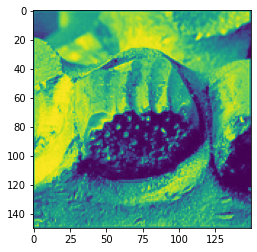

In [ ]:

a = dataall['shape'][0]

print(f'shape {a}')

d = np.array(dataall['pil'][0].getdata()).reshape(dataall['pil'][0].size[0], dataall['pil'][0].size[1])
print('center of mass:  ',nd.center_of_mass( d ))

plt.imshow(d)


1. Convert the image to the YIQ color model,
2. Apply a threshold to the I channel that sets to 1 only those pixels which have a value
between 18 and 23,
3. Apply a threshold to the Q channel which sets to 1 only those pixels which have a value
between 2 and 8, and
4. Multiply the resultant channels to form the final image

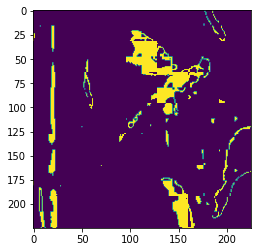

In [ ]:

a = imageio.imread('/content/drive/MyDrive/1.jpg')
rgb = a.transpose( 2,0,1 )
yiq = colorsys.rgb_to_yiq( rgb[0], rgb[1], rgb[2] )
c1 = (yiq[1]>8) * (yiq[1]<23)
c2 = (yiq[2]>2) * (yiq[2]<8)
c = c1 * c2
plt.imshow(c2)

# Channel operators  


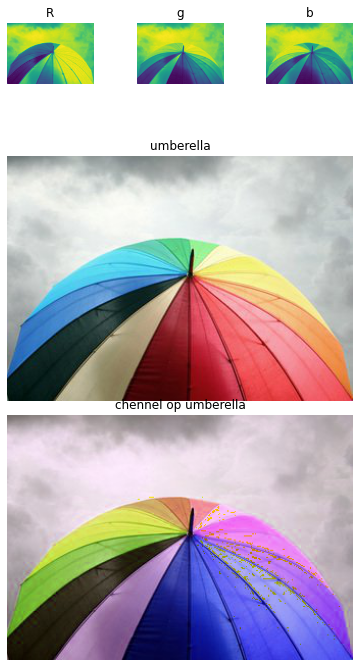

In [ ]:
# use numpy 

Image_Path =  'drive/MyDrive/colorful-umbrella-1176220.jpg'



img1 = mpimg.imread(Image_Path)
ch1 = img1[:,:,0]
ch2 = img1[:,:,1]
ch3 = img1[:,:,2]


rgbArray = np.zeros((240,339,3), 'uint8')
rgbArray[..., 0] = ch2  
rgbArray[..., 1] = ch3 * .95
rgbArray[..., 2] = ch1 + 1
img2 = Image.fromarray(rgbArray)


# bdata = 0.5 *adata[:,:,0] + 0.75*adata[:,:,1] + 0.25*adata[:,:,2]


fig = plt.figure(figsize = (12,12)) ; fig.patch.set_facecolor('w') ; fig.patch.set_alpha(0.8)

ax1 = fig.add_axes([0,.41,.1,.1]); ax1.imshow(ch1),plt.title('R'); ax1.axis('off')
ax2 = fig.add_axes([.15,.41,.1,.1]); ax2.imshow(ch2),plt.title('g'); ax2.axis('off')
ax3 = fig.add_axes([.3,.41,.1,.1]); ax3.imshow(ch3),plt.title('b'); ax3.axis('off')
ax4 = fig.add_axes([.0,0,.4,.4]); ax4.imshow(img1),plt.title('umberella'); ax4.axis('off')
ax5 = fig.add_axes([0,-.3,.4,.4]); ax5.imshow(img2),plt.title('chennel op umberella'); ax5.axis('off')

plt.show()

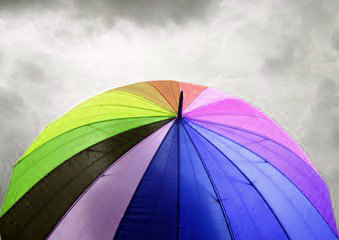

In [ ]:
# use pillow
mg = Image.open( 'drive/MyDrive/colorful-umbrella-1176220.jpg')
r,g,b = mg.split()
mg2 = Image.merge('RGB', (g,b,r) )
mg2

# INTENSITY OPERATORS


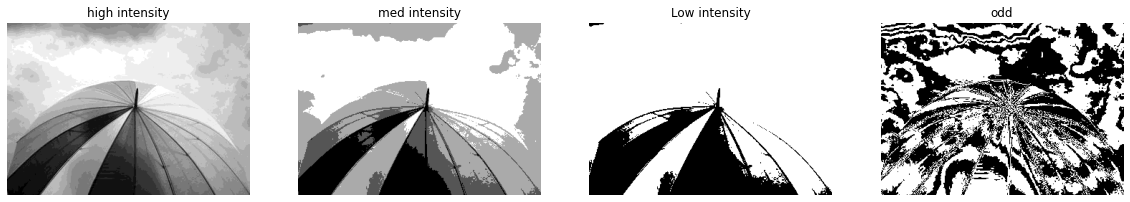

In [ ]:

mgdata = imageio.imread('drive/MyDrive/colorful-umbrella-1176220.jpg', as_gray=True).astype(np.uint8)
c1 = mgdata & 0xF0 # 240
c2 = mgdata & 0xc0 # 192
c3 = mgdata & 0x80 # 128
c4 = mgdata & 0x10 # 16
# hexadecimal (hex) number. We can tell it is a hex number because it starts
# with 0X. Hexadecimal numbers like 0X10 are not often used in daily life,
# but we see them used for certain things such as html colors, shortening
# binary numbers, computer error codes, and math exercises.
figure,ax = plt.subplots(nrows = 1, ncols = 4, sharey=True,figsize =(20,10))
ax[0].imshow(c1, cmap = 'gray'); ax[0].set(title = 'high intensity'); ax[0].axis('off')
ax[1].imshow(c2, cmap = 'gray'); ax[1].set(title = 'med intensity'); ax[1].axis('off')
ax[2].imshow(c3, cmap = 'gray'); ax[2].set(title = 'Low intensity'); ax[2].axis('off')
ax[3].imshow(c4, cmap = 'gray'); ax[3].set(title = 'odd'); ax[3].axis('off')
plt.show()

# GEOMETRIC OPERATORS


Scaling Returns an image that is a different size.
 

Affine Multiplies the matrix M by each coordinate vector.
~v1,~v2 

Window Extracts a subimage.
⇓n 

Downsample Extracts pixels according to prescription n.
Bβ 

Bending Applies a barrel or pincushion transformation.
C 

Coordinate map Moves the pixel according to the user-defined map.


Ca Concatenation Creates a larger image from the concatenation of a images from an image set.
D~v 

Shift Shifts the image.
Mα 

Morph Creates a set of new images from the morph of at least two input images.
Rα,~v 

Radial coordinate Radial coordinate transformation.
Rθ,~v 

Rotation Rotates an image through an angle θ centered at~v.
U~v 

Plop Places a smaller image in the center of a larger frame.
V~w 

Reshape Reshapes the array.
WG Warp Warps an image to grid G.
X 

Quadrant swap Exchanges quadrants I and IV. Exchanges quadrants II and III.
Lm 

Flip Flips an image about a specified axis.

In [ ]:
# SHIFT and ROTATE

amg = imageio.imread('/content/drive/MyDrive/1.jpg')
bmg = nd.rotate(amg,20,reshape=False,cval=255)
cmg = nd.shift(bmg, (25,10,0))

# imageio.imsave('lema2.jpg', cmg )

TRANSFORMATION OPERATORS

Correlation Returns the correlation of two images.

Fourier Returns the Fourier transform.

Hough Returns the Hough transform.

Polar Returns the polar coordinates.

Inverse polar Converts polar coordinates to rectilinear.

Radial polar Returns the image as a radial-polar transformation.

Inverse radial polar Returns the image as the inverse radial-polar transformation.

PCA Returns the data in a new space defined by the principal components.

Wavelet decomposition Returns the wavelet decomposition image.

RESOLUTION

Intensity resolution represents the range of values
that each pixel can have. Spatial resolution is the size of the image in terms of the number of pixels




Image Shape: 240 339
Original Image:
Down Sampled Image:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

Up Sampled Image:


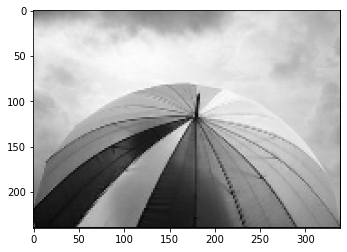

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# 

img1 = cv2.imread('drive/MyDrive/colorful-umbrella-1176220.jpg', 0)

[m, n] = img1.shape
print('Image Shape:', m, n)

print('Original Image:')
plt.imshow(img1, cmap="gray")


# Down sampling

# Assign a down sampling rate
# Here we are down sampling the
# image by 2
f = 2

# Create a matrix of all zeros for
# downsampled values
img2 = np.zeros((m//f, n//f), dtype=np.int)

# Assign the down sampled values from the original
# image according to the down sampling frequency.
# For example, if the down sampling rate f=2, take
# pixel values from alternate rows and columns
# and assign them in the matrix created above
for i in range(0, m, f):
	for j in range(0, n, f):
		try:

			img2[i//f][j//f] = img1[i][j]
		except IndexError:
			pass


# Show down sampled image
print('Down Sampled Image:')
plt.imshow(img2, cmap="gray")


# Up sampling

# Create matrix of zeros to store the upsampled image
img3 = np.zeros((m, n), dtype=np.int)
# new size
for i in range(0, m-1, f):
	for j in range(0, n-1, f):
		img3[i, j] = img2[i//f][j//f]

# Nearest neighbour interpolation-Replication
# Replicating rows

for i in range(1, m-(f-1), f):
	for j in range(0, n-(f-1)):
		img3[i:i+(f-1), j] = img3[i-1, j]

# Replicating columns
for i in range(0, m-1):
	for j in range(1, n-1, f):
		img3[i, j:j+(f-1)] = img3[i, j-1]

# Plot the up sampled image
print('Up Sampled Image:')
plt.imshow(img3, cmap="gray")




```
digital format
```
BITMAPS - JPEG - GIF - TIFF - PNG

# colors

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

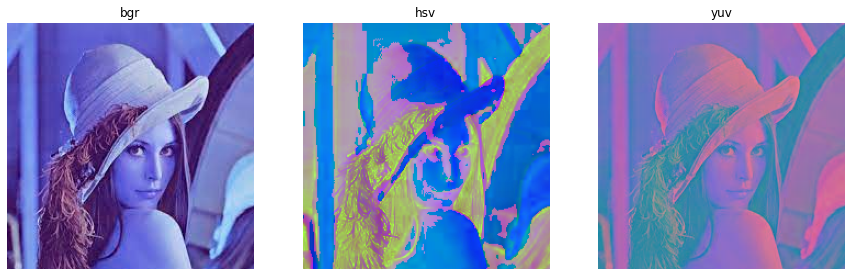

In [ ]:
import imageio
import numpy as np
import colorsys
bgr = cv2.imread('drive/MyDrive/1.jpg')
hsvImage = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
yuv = cv2.cvtColor(bgr, cv2.COLOR_BGR2YUV)

print ([x for x in dir(cv2) if x.startswith('COLOR_')])

figure,ax = plt.subplots(nrows = 1, ncols = 3, sharey=True,figsize =(15,13))
ax[0].imshow(bgr); ax[0].set(title = 'bgr'); ax[0].axis('off')
ax[1].imshow(hsvImage); ax[1].set(title = 'hsv'); ax[1].axis('off')
ax[2].imshow(yuv); ax[2].set(title = 'yuv'); ax[2].axis('off')
plt.show()

geometric intensity transformation

augmentation??

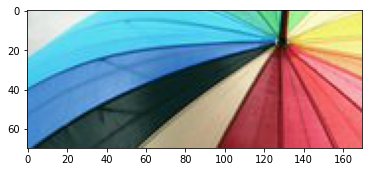

In [ ]:
###############
# select content
import imageio
amg = imageio.imread( 'drive/MyDrive/colorful-umbrella-1176220.jpg')
bmg = amg[100:170,50:220]

plt.imshow(bmg)


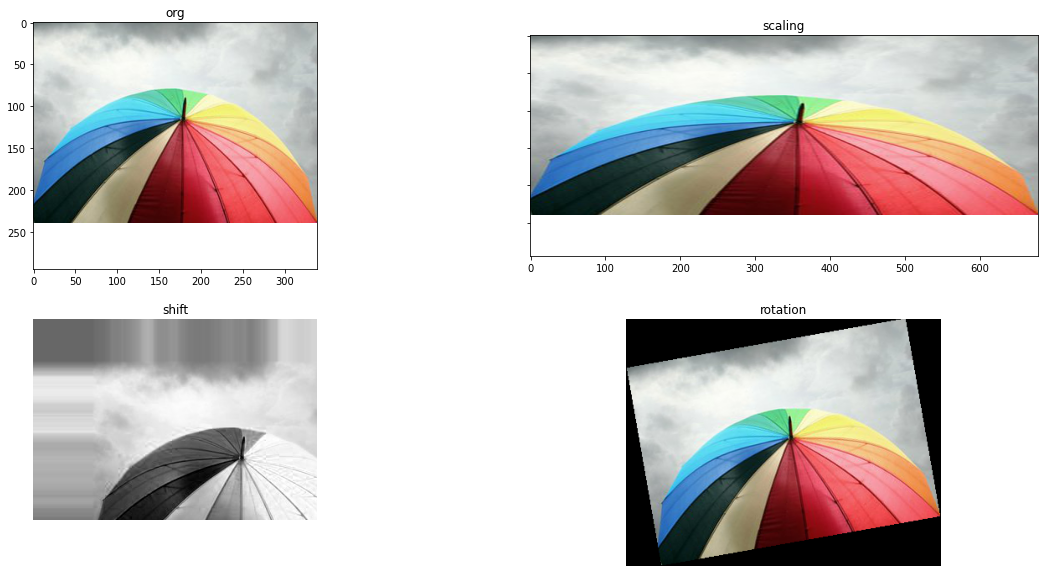

In [ ]:

adata = imageio.imread( 'drive/MyDrive/colorful-umbrella-1176220.jpg')
########
# SHIFT
bdata = nd.shift( adata, (50,70,3), mode='nearest' )
'''
mode{‘reflect’, ‘grid-mirror’, ‘constant’, ‘grid-constant’, ‘nearest’, ‘mirror’, ‘grid-wrap’, ‘wrap’}, optional
The mode parameter determines how the input array is extended beyond its boundaries. Default is ‘constant’. Behavior for each valid value is as follows
'''

###############
# scaling (zoom)
data2 = nd.zoom( adata,(1,2,1))
data3 = nd.zoom( adata,(.5,.2,1))

##########
# Rotation
data4 = nd.rotate(adata, 10 )


figure,ax = plt.subplots(nrows = 2, ncols = 2, sharey=True,figsize =(20,10))
ax[0][0].imshow(adata); ax[0][0].set(title = 'org')
ax[1][0].imshow(bdata); ax[1][0].set(title = 'shift'); ax[1][0].axis('off')
ax[0][1].imshow(data2); ax[0][1].set(title = 'scaling')
ax[1][1].imshow(data4); ax[1][1].set(title = 'rotation'); ax[1][1].axis('off')

plt.show()


The Dilation and Erosion operators are often used to fill in holes and remove single pixel noise. The
Dilation operator replaces pixel ai, j with the maximum value of its immediate neighbors,Likewise, the Erosion operator replaces pixel ai, j with the minimum value of its immediate
neighbors,

[source of this code](https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/)

[Text(0.5, 1.0, 'img_dilation')]

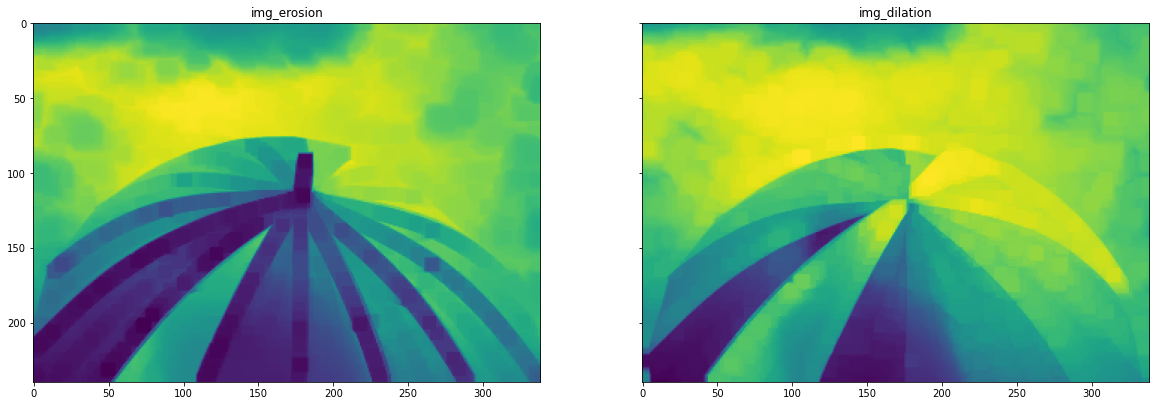

In [15]:
import cv2
import numpy as np
 
# Reading the input image
img = cv2.imread('drive/MyDrive/colorful-umbrella-1176220.jpg', 0)
 
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=2)
img_dilation = cv2.dilate(img, kernel, iterations=2)

figure,ax = plt.subplots(nrows = 1, ncols = 2, sharey=True,figsize =(20,10))
ax[0].imshow(img_erosion); ax[0].set(title = 'img_erosion')
ax[1].imshow(img_dilation); ax[1].set(title = 'img_dilation')

# COORDINATE MAPPING

The idea is that each pixel in the input space is moved to a new location in the output space. . In
practice, though, this would leave some pixels in the output undefined.

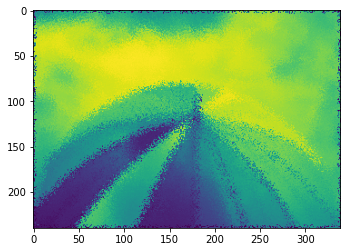

In [21]:
import imageio
import numpy as np
import scipy.ndimage as nd
adata = imageio.imread('drive/MyDrive/colorful-umbrella-1176220.jpg', as_gray=1)
V,H = adata.shape
M = np.indices( (V,H) )
d = 5
q = 2*d*np.random.ranf( M.shape ) - d
Mp = (M + q).astype(int)
bdata = nd.map_coordinates(adata, Mp) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.map_coordinates.html
plt.imshow(bdata)

to be continued . . .

in next notebook we try IMAGE MOORPHING


Image morphing is the process of gradually converting one image into another

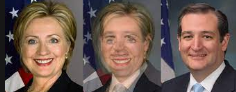